# Potato Project Phase 2
#### Thi Nguyen, 862051496
#### Sydney Pun 862053259
#### Heng Tan 862155921

## Loading the Dataset:

We will first load the Australian Wildfire fire_archive_M6_96619 dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

Aus_Fires_df = pd.read_csv("Datasets_Not_Cleaned/ForestFiresInBrazil/fire_archive_M6.csv")
Aus_Fires_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,1.1,2019-09-30,1644,Aqua,MODIS,85,6.3,292.9,14.2,N,0
36007,-28.2625,128.5494,304.9,1.0,1.0,2019-09-30,1644,Aqua,MODIS,27,6.3,290.9,6.4,N,0
36008,-28.2941,128.5123,301.7,1.0,1.0,2019-09-30,1644,Aqua,MODIS,43,6.3,290.4,5.5,N,0
36009,-28.3001,128.5530,303.6,1.0,1.0,2019-09-30,1644,Aqua,MODIS,41,6.3,290.3,5.7,N,0


In [2]:
Aus_Fires_df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,1.776382e-15,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


## Checking for Missing Values:

Here we check to see if the data has any typical marks of missing values.

In [3]:
(Aus_Fires_df.astype(np.object) == '?').any()

latitude      False
longitude     False
brightness    False
scan          False
track         False
acq_date      False
acq_time      False
satellite     False
instrument    False
confidence    False
version       False
bright_t31    False
frp           False
daynight      False
type          False
dtype: bool

In [4]:
(Aus_Fires_df.astype(np.object) == 'NaN').any()

latitude      False
longitude     False
brightness    False
scan          False
track         False
acq_date      False
acq_time      False
satellite     False
instrument    False
confidence    False
version       False
bright_t31    False
frp           False
daynight      False
type          False
dtype: bool

There are no "?" or "NaN" values that indicate a categorical variable is missing data. We can conclude that the categorical columns have no missing values.

In [5]:
(Aus_Fires_df.astype(np.object) == 0).any()

latitude      False
longitude     False
brightness    False
scan          False
track         False
acq_date      False
acq_time       True
satellite     False
instrument    False
confidence     True
version       False
bright_t31    False
frp            True
daynight      False
type           True
dtype: bool

In [6]:
Aus_Fires_df.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version       float64
bright_t31    float64
frp           float64
daynight       object
type            int64
dtype: object

For quantitative data, a numerical value of 0 might indicate missing data. We compare these potential missing values with its data type to see if we can conclude if they are really missing values or not. The data types of the variables that have values of 0 indicate that these values are not missing values. We can conclude that this dataset has no missing values.

## Aggregating Categorical Variables:

Here we make sure that each categorical variable has sufficient samples. We will examine the acq_date, satellite, instrument, and daynight categorical variables. Then we will print frequency tables for these variables and examine the result. 

In [7]:
Aus_Fires_df['acq_date'].value_counts()

2019-09-10    1317
2019-09-09    1230
2019-09-08    1200
2019-09-06    1200
2019-09-07    1075
              ... 
2019-08-17     300
2019-09-22     294
2019-09-25     293
2019-08-08     291
2019-09-21     241
Name: acq_date, Length: 61, dtype: int64

In [8]:
Aus_Fires_df['satellite'].value_counts()

Aqua     20541
Terra    15470
Name: satellite, dtype: int64

In [9]:
Aus_Fires_df['instrument'].value_counts()

MODIS    36011
Name: instrument, dtype: int64

In [10]:
Aus_Fires_df['daynight'].value_counts()

D    28203
N     7808
Name: daynight, dtype: int64

We can see that acq_date has too many categories and observing them individually will not have statistically significant difference in predicting the next wildfires, so we will be aggregating these categories.

We will be separating the acq_date categories into four smaller categories. The current category ranges from August 1, 2019 to September 30, 2019, so we will separate them into the four smaller categories: August 1-15, 2019, August 16-31, September 1-15, and September 16-30.

In [11]:
acq_date_categories = { '2019-08-01':'Aug 1-15, 2019',   '2019-08-02':'Aug 1-15, 2019',   '2019-08-03':'Aug 1-15, 2019',
                        '2019-08-04':'Aug 1-15, 2019',   '2019-08-05':'Aug 1-15, 2019',   '2019-08-06':'Aug 1-15, 2019',
                        '2019-08-07':'Aug 1-15, 2019',   '2019-08-08':'Aug 1-15, 2019',   '2019-08-09':'Aug 1-15, 2019',
                        '2019-08-10':'Aug 1-15, 2019',   '2019-08-11':'Aug 1-15, 2019',   '2019-08-12':'Aug 1-15, 2019',
                        '2019-08-13':'Aug 1-15, 2019',   '2019-08-14':'Aug 1-15, 2019',   '2019-08-15':'Aug 1-15, 2019',
                       
                        '2019-08-16':'Aug 16-31, 2019',  '2019-08-17':'Aug 16-31, 2019',  '2019-08-18':'Aug 16-31, 2019',
                        '2019-08-19':'Aug 16-31, 2019',  '2019-08-20':'Aug 16-31, 2019',  '2019-08-21':'Aug 16-31, 2019',
                        '2019-08-22':'Aug 16-31, 2019',  '2019-08-23':'Aug 16-31, 2019',  '2019-08-24':'Aug 16-31, 2019',
                        '2019-08-25':'Aug 16-31, 2019',  '2019-08-26':'Aug 16-31, 2019',  '2019-08-27':'Aug 16-31, 2019',
                        '2019-08-28':'Aug 16-31, 2019',  '2019-08-29':'Aug 16-31, 2019',  '2019-08-30':'Aug 16-31, 2019',
                        '2019-08-31':'Aug 16-31, 2019',
                       
                        '2019-09-01':'Sept 1-15, 2019',  '2019-09-02':'Sept 1-15, 2019',  '2019-09-03':'Sept 1-15, 2019',
                        '2019-09-04':'Sept 1-15, 2019',  '2019-09-05':'Sept 1-15, 2019',  '2019-09-06':'Sept 1-15, 2019',
                        '2019-09-07':'Sept 1-15, 2019',  '2019-09-08':'Sept 1-15, 2019',  '2019-09-09':'Sept 1-15, 2019',
                        '2019-09-10':'Sept 1-15, 2019',  '2019-09-11':'Sept 1-15, 2019',  '2019-09-12':'Sept 1-15, 2019',
                        '2019-09-13':'Sept 1-15, 2019',  '2019-09-14':'Sept 1-15, 2019',  '2019-09-15':'Sept 1-15, 2019',
                       
                        '2019-09-16':'Sept 16-30, 2019', '2019-09-17':'Sept 16-30, 2019', '2019-09-18':'Sept 16-30, 2019',
                        '2019-09-19':'Sept 16-30, 2019', '2019-09-20':'Sept 16-30, 2019', '2019-09-21':'Sept 16-30, 2019',
                        '2019-09-22':'Sept 16-30, 2019', '2019-09-23':'Sept 16-30, 2019', '2019-09-24':'Sept 16-30, 2019',
                        '2019-09-25':'Sept 16-30, 2019', '2019-09-26':'Sept 16-30, 2019', '2019-09-27':'Sept 16-30, 2019',
                        '2019-09-28':'Sept 16-30, 2019', '2019-09-29':'Sept 16-30, 2019', '2019-09-30':'Sept 16-30, 2019' }

Aus_Fires_df['acq_date'] = [acq_date_categories[x] for x in Aus_Fires_df['acq_date']]
Aus_Fires_df['acq_date'].value_counts()

Sept 1-15, 2019     13259
Aug 1-15, 2019       8716
Aug 16-31, 2019      7538
Sept 16-30, 2019     6498
Name: acq_date, dtype: int64

There are now four categories. The time period from early September seems to have the most amount of wildfires.

Next, we will be making box plots of the new acq_date categories and the satellite and daynight categories.

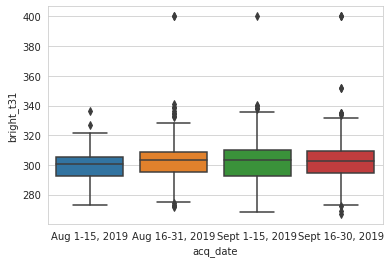

In [12]:
def plot_box(Aus_Fires_df, col, col_y = 'bright_t31'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=Aus_Fires_df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(Aus_Fires_df, 'acq_date')

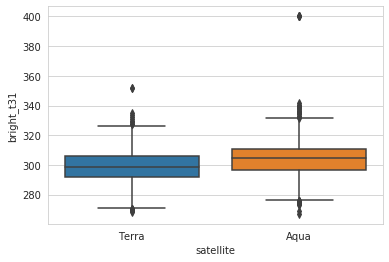

In [13]:
def plot_box(Aus_Fires_df, col, col_y = 'bright_t31'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=Aus_Fires_df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(Aus_Fires_df, 'satellite')

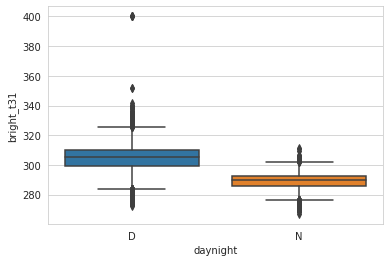

In [18]:
def plot_box(Aus_Fires_df, col, col_y = 'bright_t31'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=Aus_Fires_df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(Aus_Fires_df, 'daynight')

## Transforming Numeric Variables:

To improve performance of machine learning models, we will apply transformations of the values. Typically, transformations are used to make the relationships between variables more linear, closer to Normal, or at least more symmetric. These transformations can include taking logarithms, exponential transformations and power transformations.

Here we will transform the acq_time, confidence, and brightness by displaying and examining histograms of the label. 

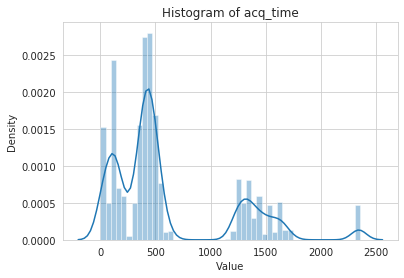

In [31]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(Aus_Fires_df['acq_time'], 'acq_time')

The distribution of acq_time is skewed left and multimodal. We can see that the fires are least likely to start at around 10 am and 8 pm and most likely to start at midnight to 5 am UTC. Other smaller spikes in wildfires happen at around 3 pm.

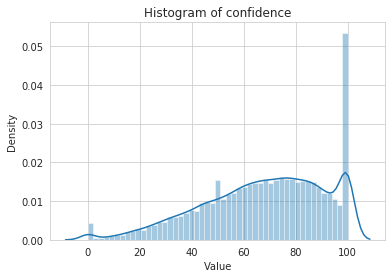

In [32]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(Aus_Fires_df['confidence'], 'confidence')

The distribution of acq_time is skewed right and almost unimodal. We can see that the distribution softly peaks at almost 80% confidence. The largest peak is at 100% confidence. There are a few smaller peaks at 0% and 50% confidence.

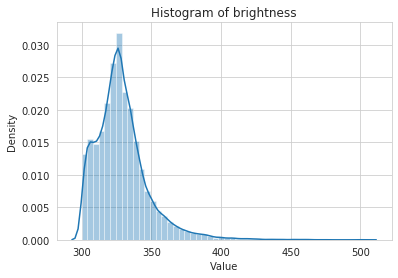

In [30]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(Aus_Fires_df['brightness'], 'brightness')

The distribution of brightness is skewed left. We can see that the temperatures are mostly in the low to mid 300 degrees Kelvin. There are some outliers of temperatures reaching up to 500 degrees Kelvin.

Next, we will be making scatterplots of our variables.

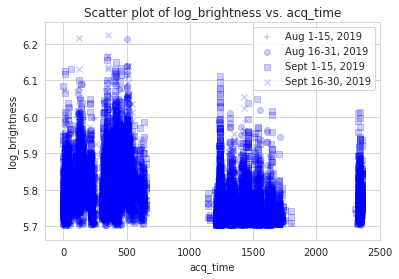

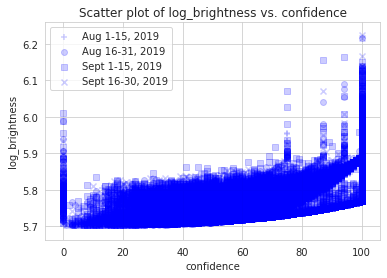

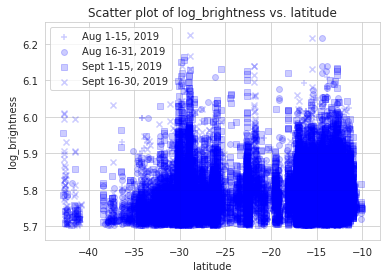

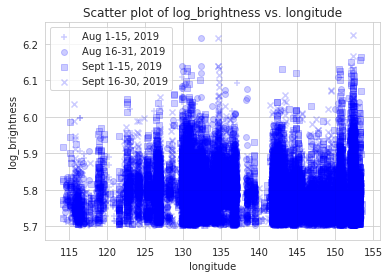

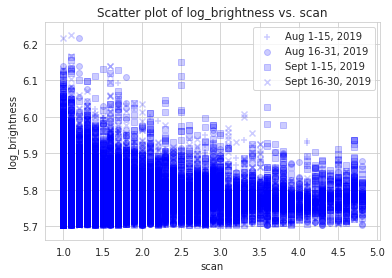

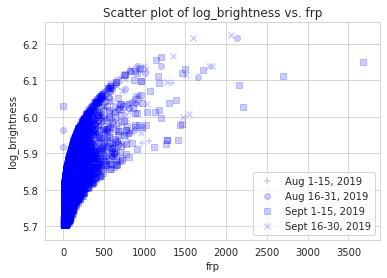

In [45]:
#Aus_Fires_df['log_brightness'] = np.log(Aus_Fires_df['brightness'])
def plot_scatter_shape(Aus_Fires_df, cols, shape_col = 'acq_date', col_y = 'log_brightness', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = Aus_Fires_df[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = Aus_Fires_df[Aus_Fires_df[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['acq_time', 'confidence', 'latitude', 'longitude', 'scan', 'frp']
plot_scatter_shape(Aus_Fires_df, num_cols)   

We can see that the relationships between brightness and confidence are more linear while the relationships between brightness and frp are more curvilinear.